# Allen Institute
## 03_feat_select
---
## Dataset
- `../data/m1_10x_ml/train_whole_log.pkl`

## WorkFlow
- Hyperparameter tuning
 
 **Notes)**
 
 if kernel dies during running codes, you can ommit completed sections indexed if alphabets

In [1]:
import os
import json
from typing import NamedTuple, Dict, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tools.figure import cns_markers, fig_kwarg

In [2]:
class Config(NamedTuple):
    data: pd.core.frame.DataFrame = pd.read_pickle(
        "../data/m1_10x_ml/train_whole_log.pkl"
    )
    label: pd.core.frame.DataFrame = pd.read_csv(
        "../data/m1_10x_meta/metadata.csv", index_col=0
    ).class_label
    save_dir: str = "../out/m1_10x/03_feat_select"
    fig_kwarg: Dict[str, Union[str, int, float]] = fig_kwarg
    save_file: bool = False

In [3]:
conf = Config(save_file=True)

In [4]:
os.makedirs(conf.save_dir, exist_ok=True)

---
## Feature engineering

In [5]:
df_group = conf.data.loc[
    :,
    conf.data.max() > 0
].assign(
    label=conf.label.loc[conf.data.index]
).groupby("label")

In [6]:
df_group.mean()

,WASH7P,LOC105379213,LOC729737,LOC100996442,LOC102725121,LOC102723897,LOC102723917,LOC105379431,LOC100134822,LOC105378947,...,ATP8,ATP6,COX3,TRNG,ND3,ND4L,ND4,ND5,ND6,CYTB
label,,,,,,,,,,,,,,,,,,,,,
GABAergic,0.084187,0.012854,0.045020,0.003454,0.000000,0.260418,0.502294,0.032479,0.018240,0.018112,...,0.158547,6.390357,8.021514,0.000000,4.360597,0.983260,6.963164,3.120680,0.175227,6.921401
Glutamatergic,0.136780,0.016313,0.175263,0.004915,0.000000,0.349472,0.934824,0.042306,0.035062,0.011066,...,0.124270,6.604449,7.875673,0.001825,4.567092,1.006845,6.862737,3.116766,0.142031,7.162734
Non-Neuronal,0.044277,0.001831,0.005564,0.000000,0.002486,0.062978,0.088286,0.007290,0.018987,0.007114,...,0.037610,3.218283,4.176808,0.000000,2.153771,0.319437,3.280929,0.865340,0.052821,3.620169


In [7]:
args = lambda data: dict(
    bins=np.ceil(np.sqrt(len(data))).astype(int),
    grid=False,
    color=".2",
    alpha=0.3,
    edgecolor=".2"
)

In [8]:
data = pd.DataFrame(
    df_group.mean(),
    index=df_group.mean().index,
    columns=df_group.mean().columns
).std().sort_values(ascending=False)

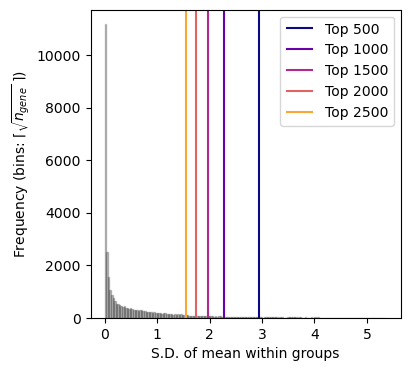

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))

data.hist(**args(data))

ylim = ax.get_ylim()

for i, v in enumerate(np.arange(500, 3000, 500)):
    ax.vlines(
        data.iloc[v], ymin=0,
        ymax=ylim[1],
        color=plt.cm.plasma(i/5),
        label=f"Top {v}"
    )
    
ax.set_ylim(*ylim)
ax.legend();

ax.set(
    xlabel="S.D. of mean within groups",
    ylabel="Frequency (bins: $\lceil\sqrt{n_{gene}}\;\\rceil$)",
    title=""
);

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/hist.png", **conf.fig_kwarg)

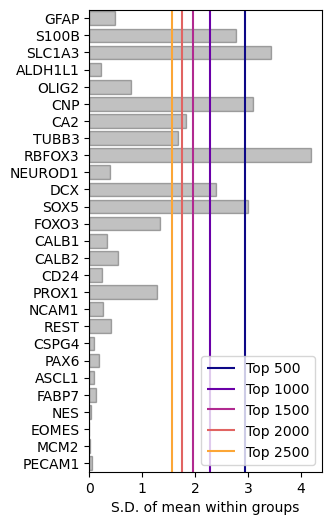

In [10]:
fig, ax = plt.subplots(figsize=(3, 6))

sns.barplot(
    x=data.loc[cns_markers],
    y=cns_markers,
    orient="h", color=".2", edgecolor="k", alpha=0.3
)

ylim = ax.get_ylim()

for i, v in enumerate(np.arange(500, 3000, 500)):
    ax.vlines(
        data.iloc[v], ymin=ylim[1],
        ymax=ylim[0],
        color=plt.cm.plasma(i/5),
        label=f"Top {v}"
    )
    
ax.set_ylim(*ylim)
ax.legend();

ax.set(
    xlabel="S.D. of mean within groups",
    title=""
);

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/bar.png", **conf.fig_kwarg)

In [11]:
top = 1000

In [12]:
df_feat = conf.data.loc[:, data.iloc[:top].index]
df_feat.index.name = "$\log_2(RPM+1)$"

In [13]:
df_feat.head()

,FGF14,ROBO2,DLGAP1,OPCML,CCSER1,FRMPD4,FGF12,RIMS2,KCNQ5,GRIN2B,...,STMN3,TLK1,MARCH4,LAMC1,GPATCH2,OPALIN,PLLP,TBRG1,SULT4A1,ABCC5
$\log_2(RPM+1)$,,,,,,,,,,,,,,,,,,,,,
CTCCACATCGCGTCGA-LKTX_190130_01_H01,10.751116,11.750697,11.790214,10.041155,11.902658,9.167826,10.581295,9.751952,12.104243,8.905293,...,0.000000,8.584117,0.000000,0.000000,6.595351,6.595351,0.000000,6.595351,0.000000,6.595351
AACCACAGTGAGTGAC-LKTX_190129_01_D01,11.347843,0.000000,11.058459,11.473328,11.669660,10.589234,9.696952,11.411949,12.136106,8.890900,...,5.912018,6.899989,0.000000,7.480919,5.912018,0.000000,0.000000,5.912018,5.912018,8.214650
ATGGGTTAGCTTAGTC-LKTX_190130_01_H01,0.000000,7.716855,7.716855,0.000000,0.000000,7.716855,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.713422,0.000000,0.000000,0.000000,10.033287,7.716855,0.000000,0.000000,0.000000
TCGGGTGAGTTTCTTC-LKTX_190130_01_G01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.496776,0.000000,0.000000,0.000000,8.496776,0.000000,0.000000,9.494778,0.000000
ACATGCAGTATCTTCT-LKTX_190129_01_D01,11.131247,0.000000,12.393906,12.086992,10.553797,8.577991,11.853460,10.616950,8.660243,9.488757,...,0.000000,8.077063,4.549701,6.093001,6.502746,0.000000,0.000000,7.303266,6.093001,8.660243


---
## Export

In [14]:
df_feat.to_csv(f"../data/m1_10x_ml/train_top{top}_log.csv", index=True)
df_feat.to_pickle(f"../data/m1_10x_ml/train_top{top}_log.pkl")

In [16]:
df_test = pd.read_pickle(f"../data/m1_10x_ml/test_whole_log.pkl")

df_test.loc[:, df_feat.columns].to_csv(f"../data/m1_10x_ml/test_top{top}_log.csv", index=True)
df_test.loc[:, df_feat.columns].to_pickle(f"../data/m1_10x_ml/test_top{top}_log.pkl")